In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as stats
pd.plotting.register_matplotlib_converters()
from sklearn import svm

In [2]:
df=pd.read_csv('Placement_Data_Full_Class_1.csv')

In [3]:
df.degree_t.value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [4]:
df.drop(['Unnamed: 0','sl_no'],axis=1,inplace=True)

In [32]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:1.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 13)
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


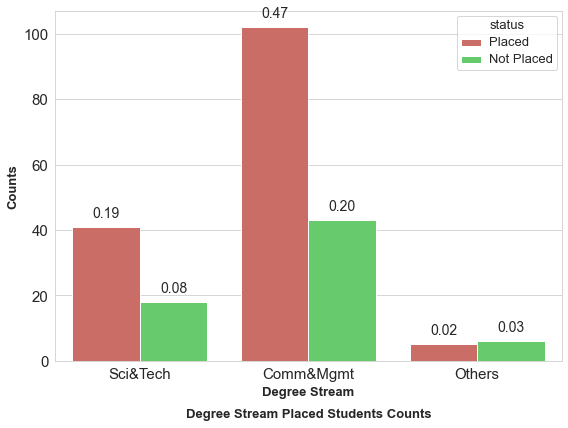

In [62]:
sns.set_style(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x="degree_t",hue="status",data=df)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,'{:1.2f}'.format(height/df.degree_t.shape[0]),ha='center',size = 14)
    
plt.setp(ax.get_legend().get_texts(), fontsize='13') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='13') # for legend title
plt.title("Degree Stream Placed Students Counts",fontsize=13,y=-0.18,fontweight='bold')

plt.tick_params(labelsize=15)
plt.ylabel("Counts",fontsize=13,fontweight='bold')
plt.xlabel("Degree Stream",fontsize=13,fontweight='bold')
plt.tight_layout()
plt.savefig('Degree Stream Placement Counts.eps')

In [6]:
cont_tb=pd.crosstab(df.degree_t,df.status,margins=True)

In [12]:
cont_tb


status,Not Placed,Placed,All
degree_t,,,
Comm&Mgmt,43,102,145
Others,6,5,11
Sci&Tech,18,41,59
All,67,148,215


In [13]:
#chi square test of indendence
from scipy.stats import chi2_contingency
(chi2,p,dof,_)=chi2_contingency([cont_tb.iloc[0].values,cont_tb.iloc[1].values,cont_tb.iloc[2].values])

In [14]:
print("chi2   :",chi2)
print("p   :",p)
print("degree of freedom   :",dof)
print("Expected values  :",_)

chi2   : 2.9690428771222925
p   : 0.5630192961580869
degree of freedom   : 4
Expected values  : [[ 45.18604651  99.81395349 145.        ]
 [  3.42790698   7.57209302  11.        ]
 [ 18.38604651  40.61395349  59.        ]]


# Crammer's V Test


In [11]:
np.sqrt(chi2/(df.shape[0]))

0.11751383643663912